In [ ]:
!nvidia-smi

Sun Mar 31 14:20:45 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.1/78.2 GB disk)


In [ ]:

from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets


In [ ]:

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="LehEvluGuH6BAe7lNC3U")
project = rf.workspace("project-986i8").project("drone-uskpc")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Drone-1 in yolov8:: 100%|██████████| 35424/35424 [00:13<00:00, 2568.65it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=15 imgsz=800 plots=True

/content
New https://pypi.org/project/ultralytics/8.1.38 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Drone-1/data.yaml, epochs=15, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=F

In [ ]:
!ls {HOME}/runs/detect/train3/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1711894993.f7a471465074.3288.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch4905.jpg  weights
P_curve.png					    train_batch4906.jpg
PR_curve.png					    train_batch4907.jpg


/content


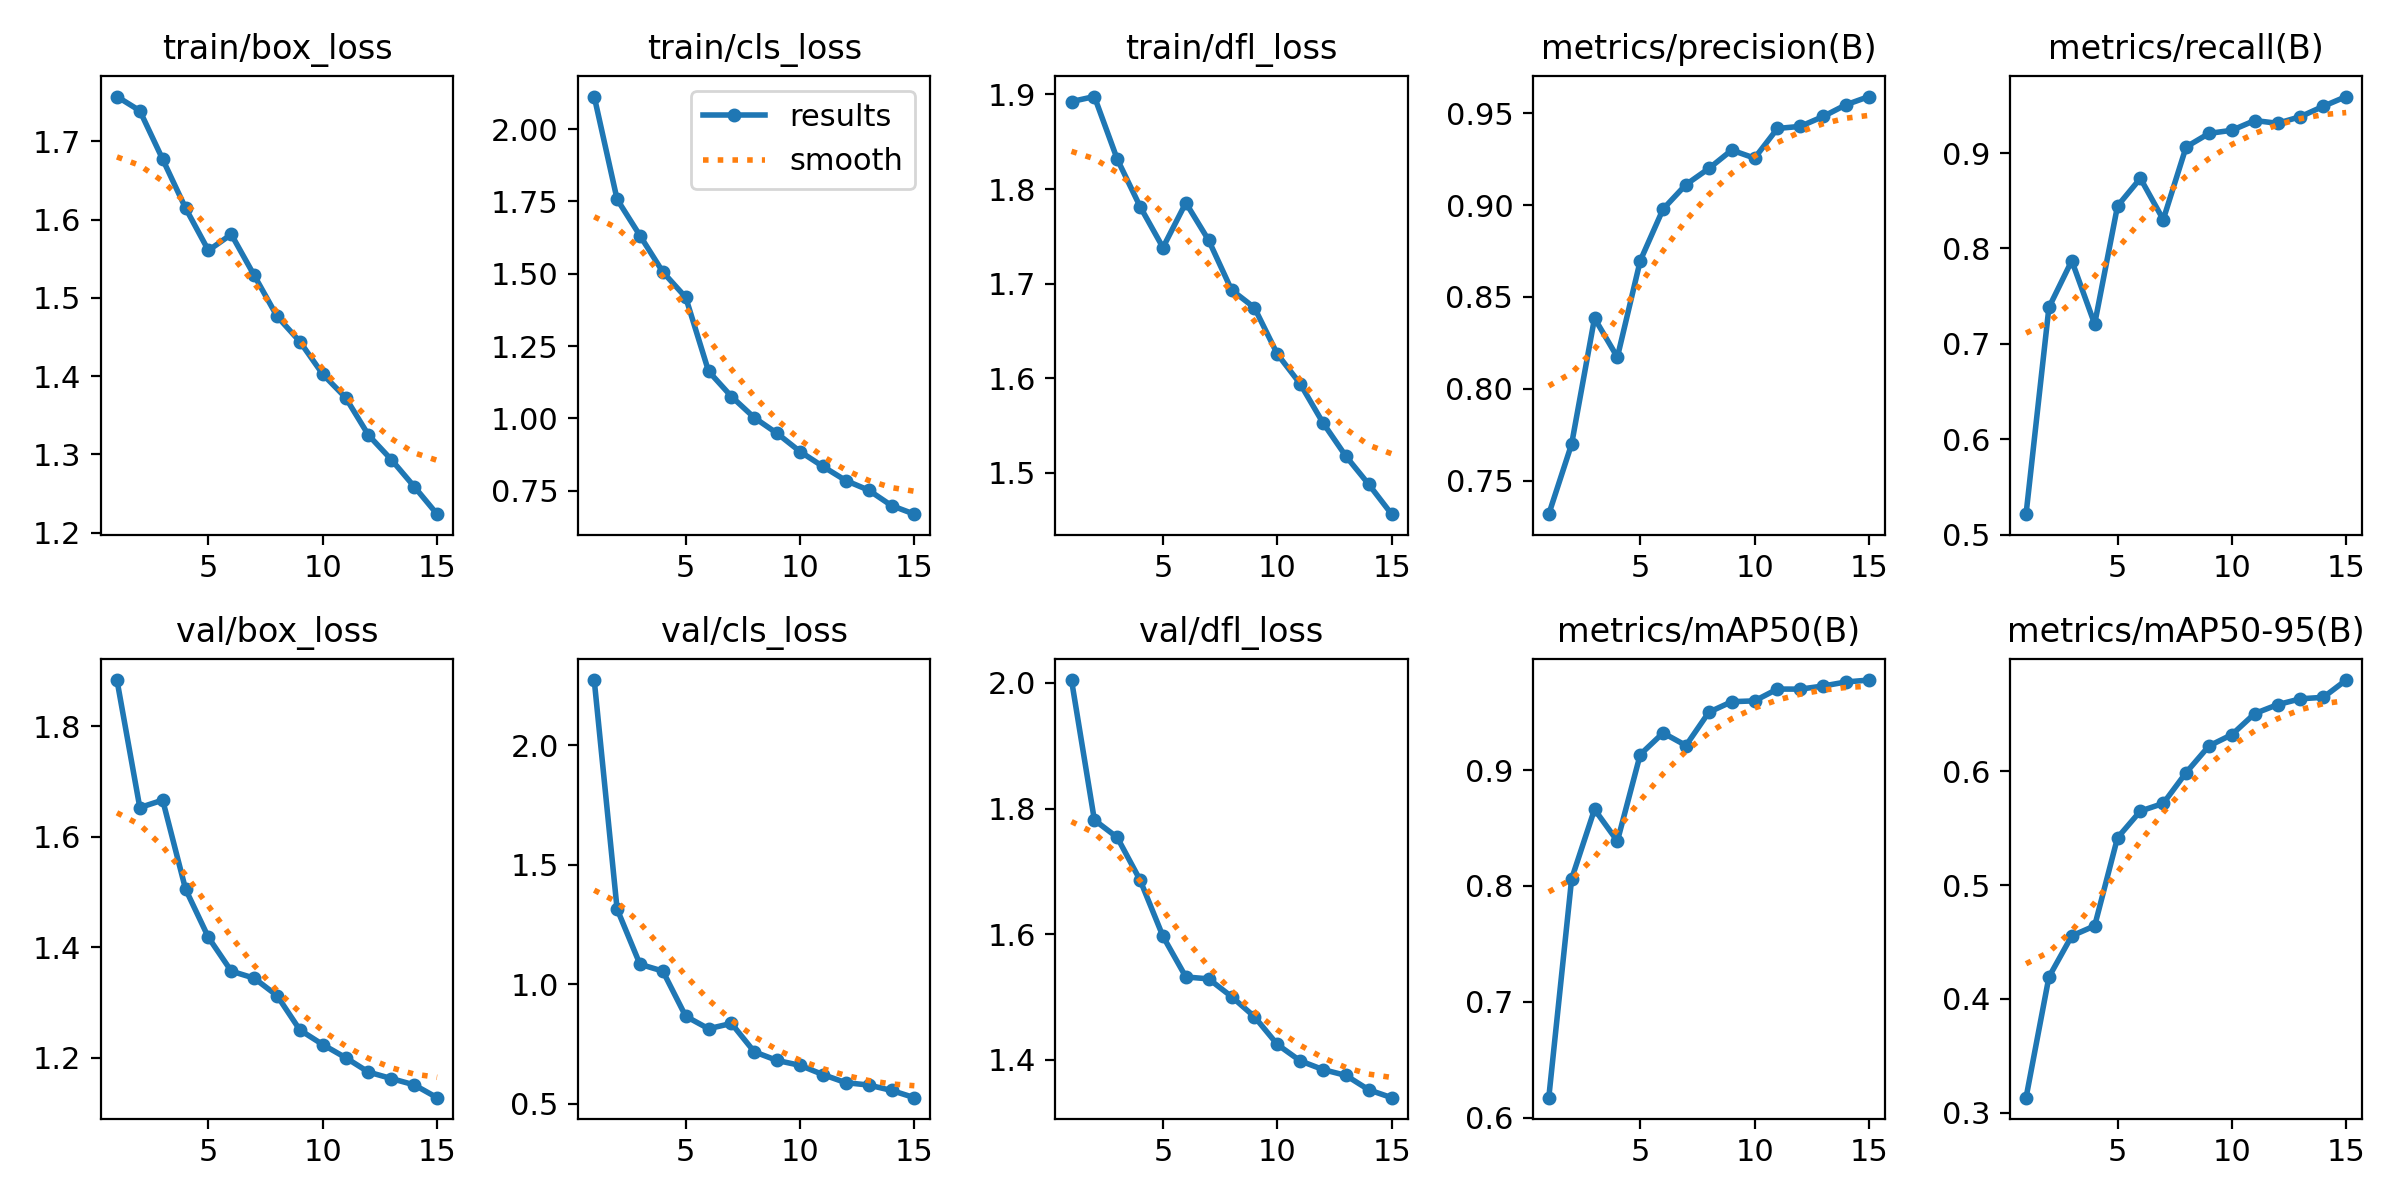

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/results.png', width=600)

/content


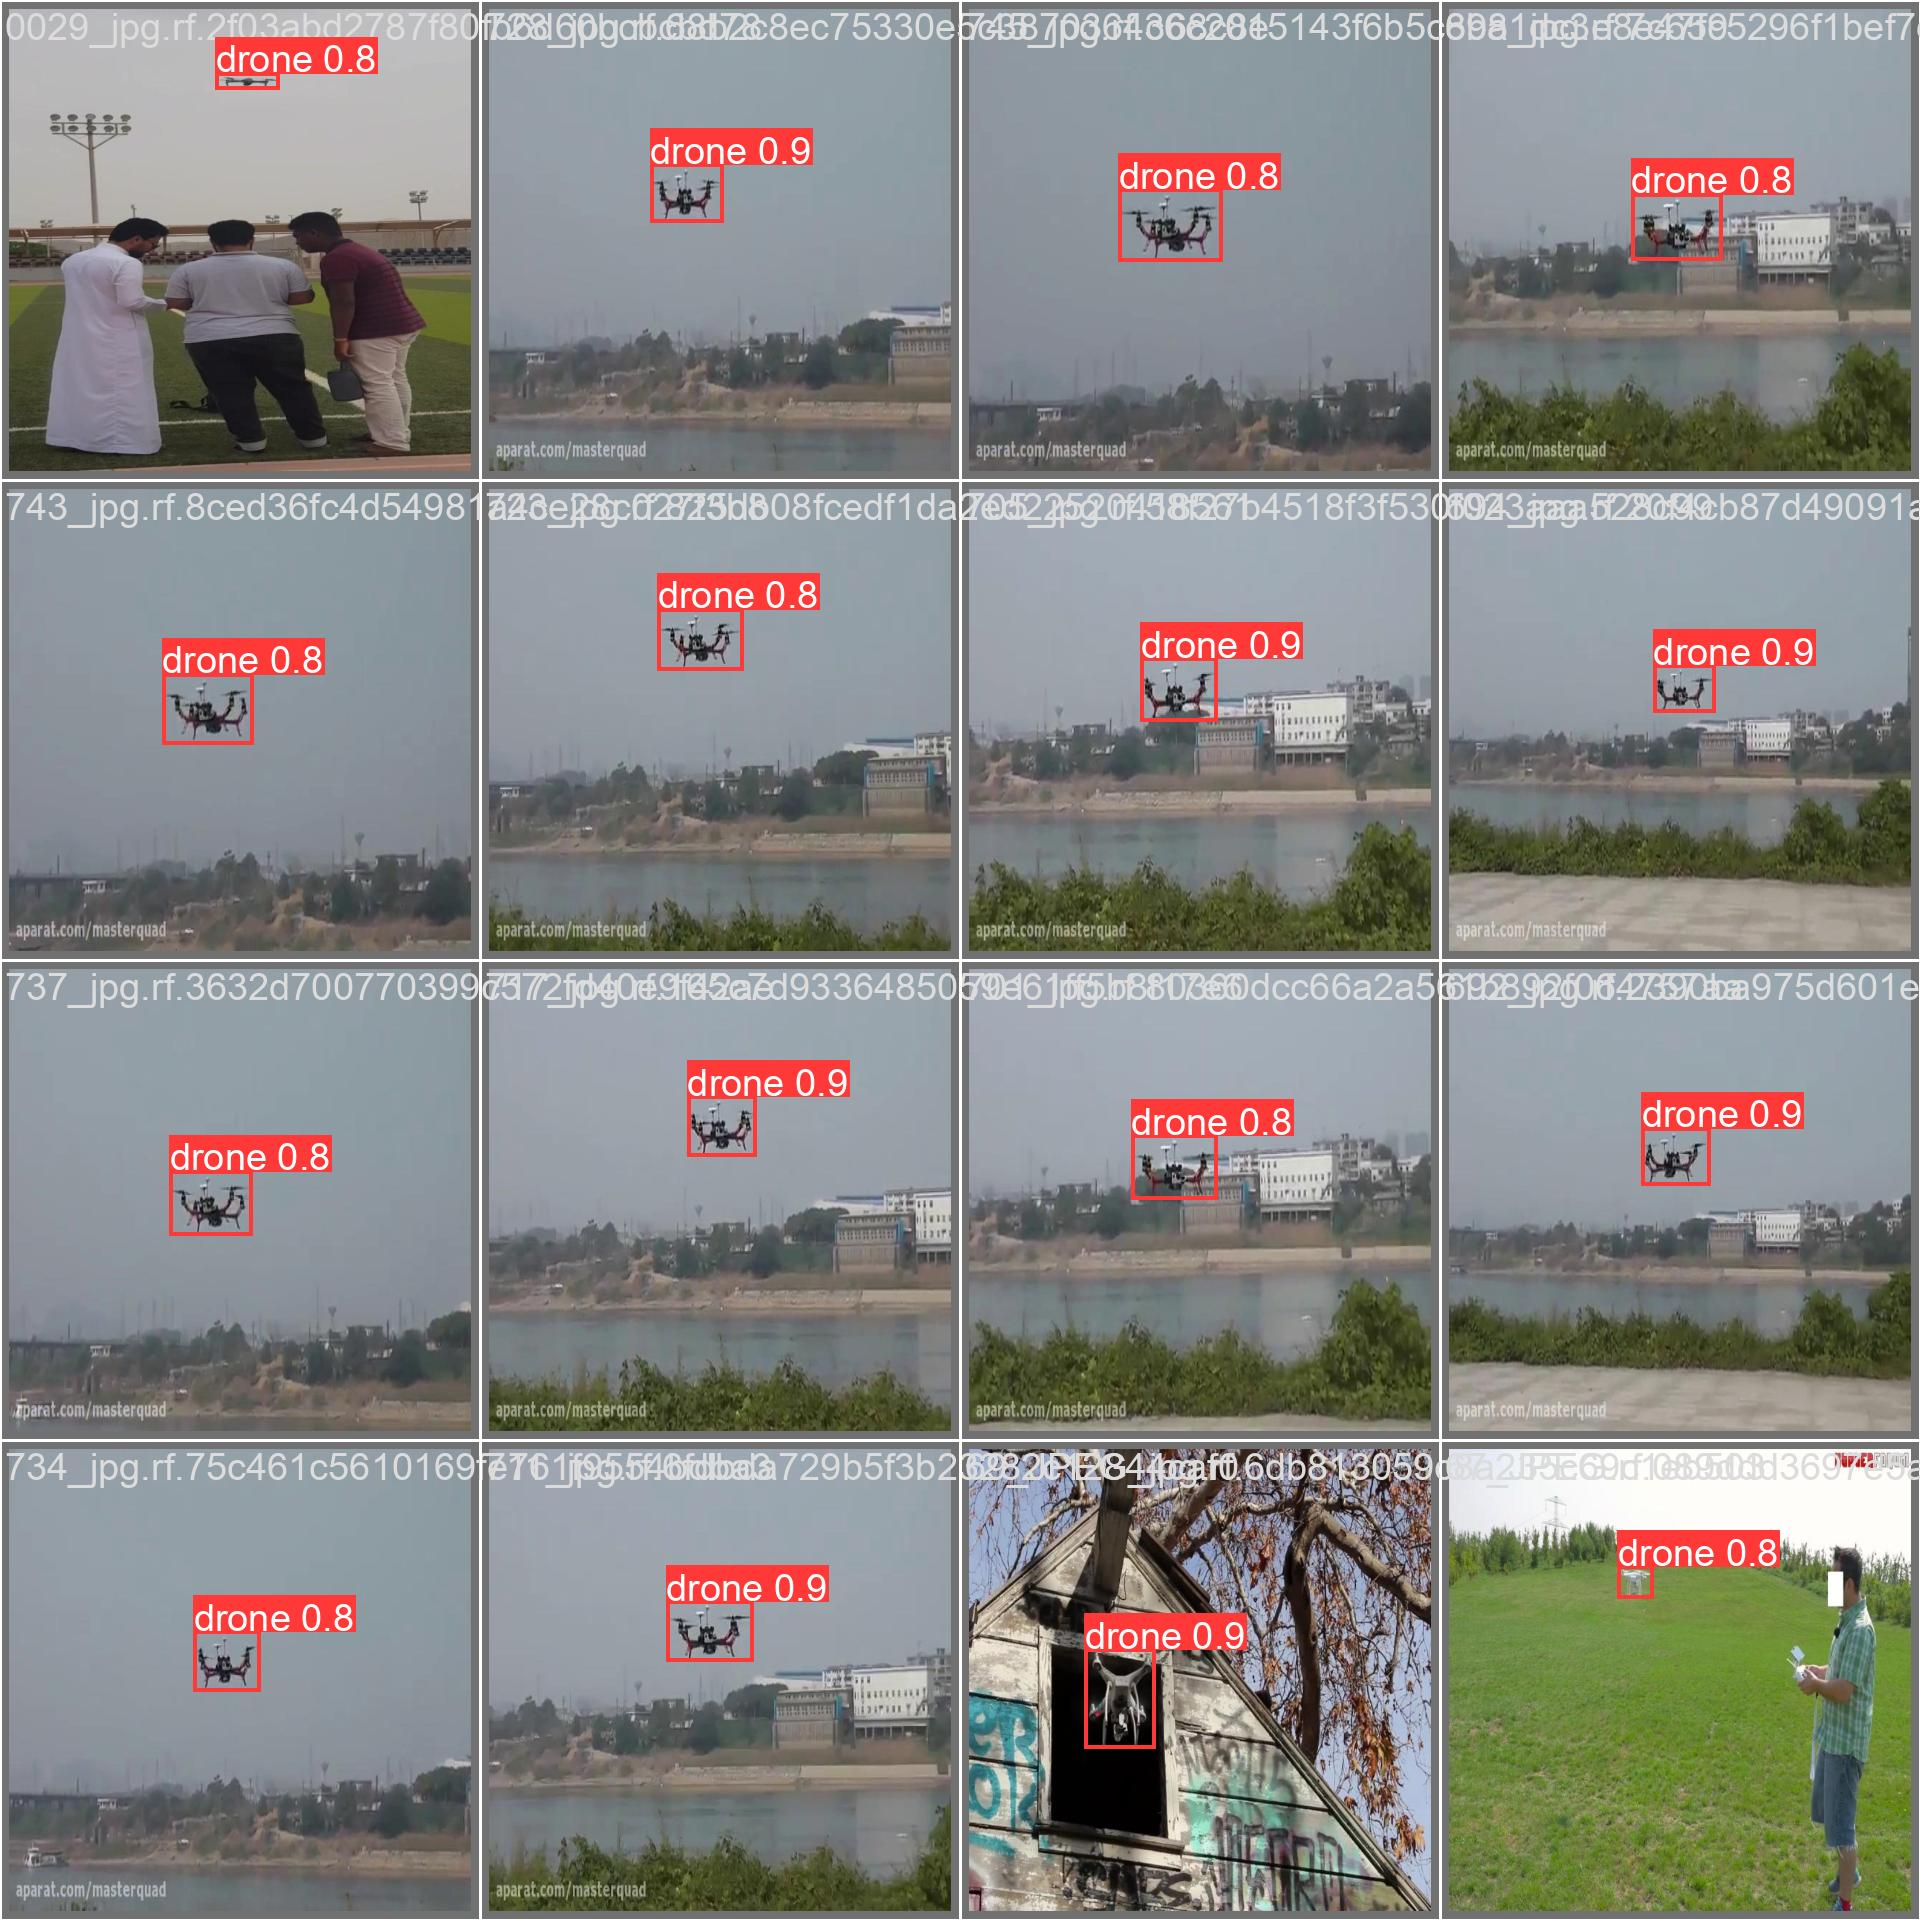

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/Drone-1/valid/labels.cache... 1342 images, 0 backgrounds, 0 corrupt: 100% 1342/1342 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 84/84 [00:28<00:00,  2.98it/s]
                   all       1342       1470      0.959      0.959      0.977       0.68
Speed: 1.1ms preprocess, 13.6ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train3/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/677 /content/Drone-1/test/images/0003_jpg.rf.221764dff4ad0a1b94c09b3c606d497c.jpg: 800x800 1 drone, 22.5ms
image 2/677 /content/Drone-1/test/images/0014_jpg.rf.9946695ac3a26f54fed495f1b49409d3.jpg: 800x800 1 drone, 22.6ms
image 3/677 /content/Drone-1/test/images/0154_jpg.rf.a431efc2fd080bb45197b6fecae13541.jpg: 800x800 1 drone, 22.5ms
image 4/677 /content/Drone-1/test/images/0222_jpg.rf.a3f45f5b903641a39afb14ae5c83d12a.jpg: 800x800 1 drone, 22.5ms
image 5/677 /content/Drone-1/test/images/0234_jpg.rf.1120ed29ddaeae58f6421bb81811fe44.jpg: 800x800 1 drone, 22.4ms
image 6/677 /content/Drone-1/test/images/0254_jpg.rf.b993fd71b1c1fc21641c9e5d89a81334.jpg: 800x800 1 drone, 22.4ms
image 7/677 /content/Drone-1/test/images/0256_jpg.rf.8d201cc28bbbe087b4e4fe15ab33c868.jpg

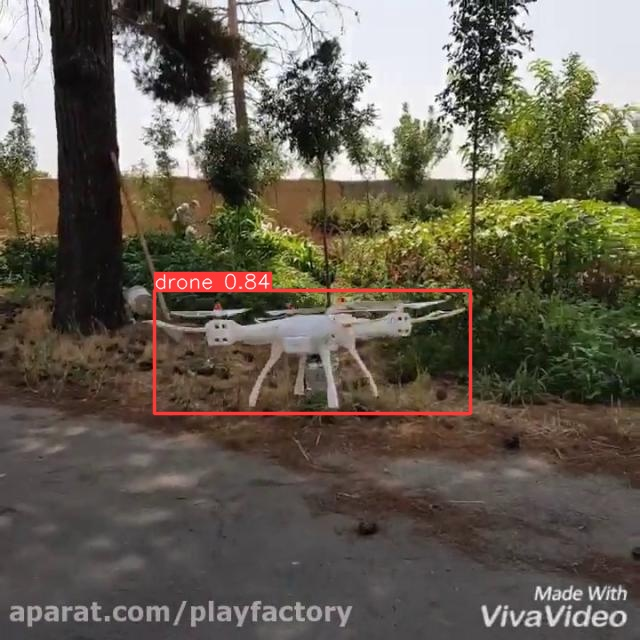

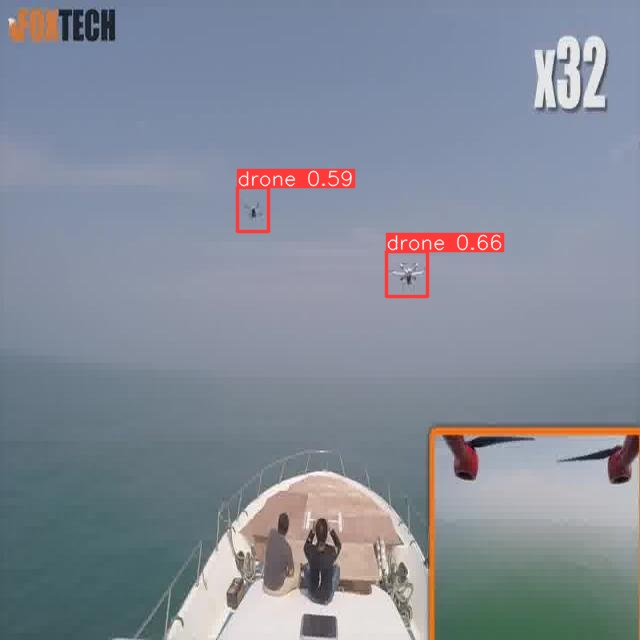

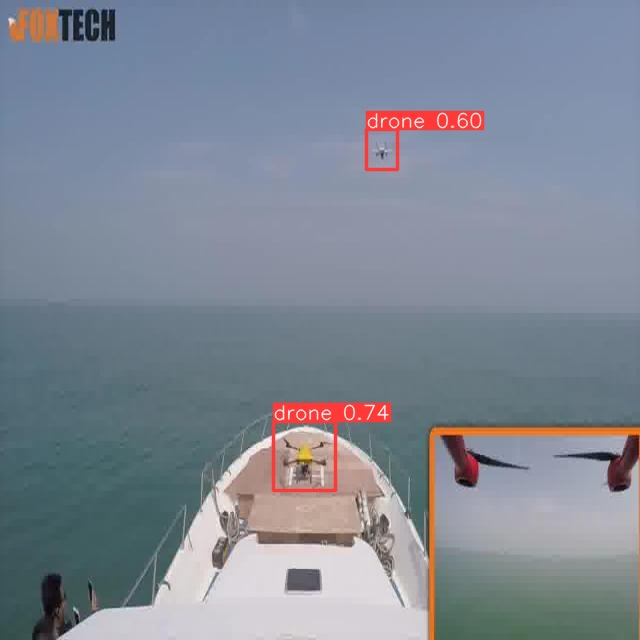

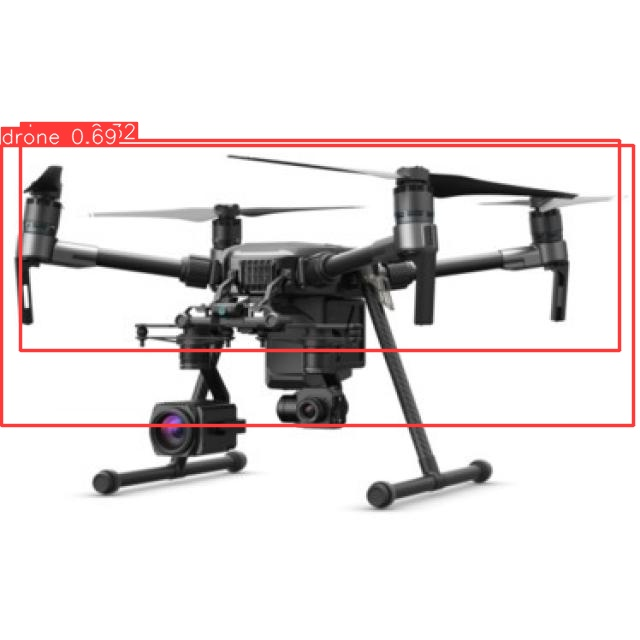

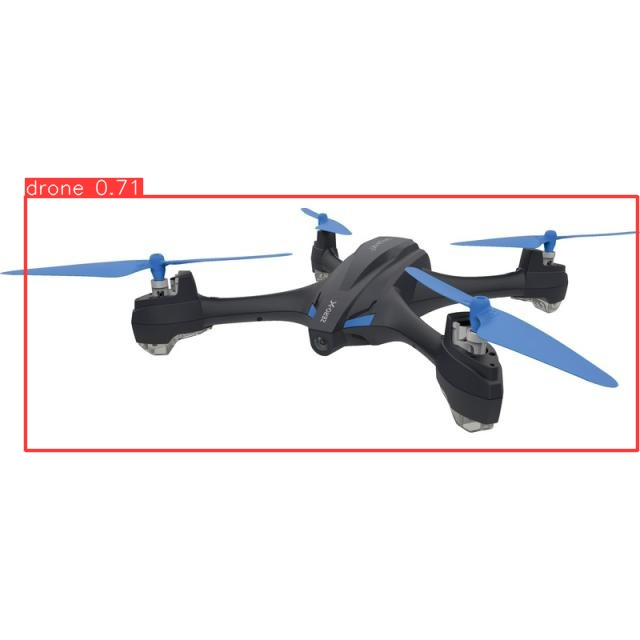

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:5]:
      display(Image(filename=image_path, width=600))
      print("\n")


In [ ]:
#from google.colab import files

# Provide the path to the file you want to download
#file_path = '/content/runs/detect/train3/weights/best.pt'

# Initiate the download
#files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#from google.colab import files

# Provide the path to the file you want to download
#file_path = '/content/runs/detect/train3/weights/last.pt'

# Initiate the download
#files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>